# COMP0189: Applied Artificial Intelligence
## Week 1 (Data Preprocessing)

### After this week you will be able to ...
- Load datasets using scikit-learn.
- Appreciate the importance of exploratory data analysis (EDA).
- Learn and apply various preprocessing techniques (scaling, encoding, handling missing values).
- Compare the impact of preprocessing on model performance.

### Acknowledgements
- https://github.com/UCLAIS/Machine-Learning-Tutorials
- https://www.cs.columbia.edu/~amueller/comsw4995s19/schedule/
- https://scikit-learn.org/stable/
- https://archive.ics.uci.edu/ml/datasets/adult

## Introduction to Scikit-learn


Why do we use sklearn??

1. Example Datasets
    - sklearn.datasets : Provides example datasets

2. Feature Engineering  
    - sklearn.preprocessing : Variable functions as to data preprocessing
    - sklearn.feature_selection : Help selecting primary components in datasets
    - sklearn.feature_extraction : Vectorised feature extraction
    - sklearn.decomposition : Algorithms regarding Dimensionality Reduction

3. Data split and Parameter Tuning  
    - sklearn.model_selection : 'Train Test Split' for cross validation, Parameter tuning with GridSearch

4. Evaluation  
    - sklearn.metrics : accuracy score, ROC curve, F1 score, etc.

5. ML Algorithms
    - sklearn.ensemble : Ensemble, etc.
    - sklearn.linear_model : Linear Regression, Logistic Regression, etc.
    - sklearn.naive_bayes : Gaussian Naive Bayes classification, etc.
    - sklearn.neighbors : Nearest Centroid classification, etc.
    - sklearn.svm : Support Vector Machine
    - sklearn.tree : DecisionTreeClassifier, etc.
    - sklearn.cluster : Clustering (Unsupervised Learning)

6. Utilities  
    - sklearn.pipeline: pipeline of (feature engineering -> ML Algorithms -> Prediction)

7. Train and Predict  
    - fit()
    - predict()

8. and more...

In [1]:
%pip install scikit-learn==1.7.2 matplotlib==3.10.8 pandas==2.3.3 seaborn==0.13.2

In [2]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

## 1. Datasets
We will use two datasets to illustrate how to approach 1) a regression task and 2) a classification task.

### **1. California House Price Dataset** (regression task)




> Take some time to look at the different predictor variables. What do they mean and how do you expect them to influence the target variable (median house price)?






In [3]:
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
print('California dataset feature names: ', housing.feature_names)
print('Number of features: ', len(housing.feature_names))

California dataset feature names:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Number of features:  8


**Exploratory data analysis**

Why is this useful?
- Understand dataset characetristic in more detail (range, distribution, inter-variable relationships).
- Identify necessary preprocessing steps (handle missing values and outliers, encoding and scaling features..).

In [5]:
# convert the dataset into a dataframe
df = pd.DataFrame(housing.data, columns=housing.feature_names)
# extract the target variable - MEDV = median house value (in $100,000s)
df['MEDV'] = housing.target

Basic statistics

In [6]:
print("Dataset sample:")
print(df.head())
print("Basic statistics:")
print(df.describe())

Dataset sample:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude   MEDV  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
Basic statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333

Visualise the feature and target distributions - are all features continuous?

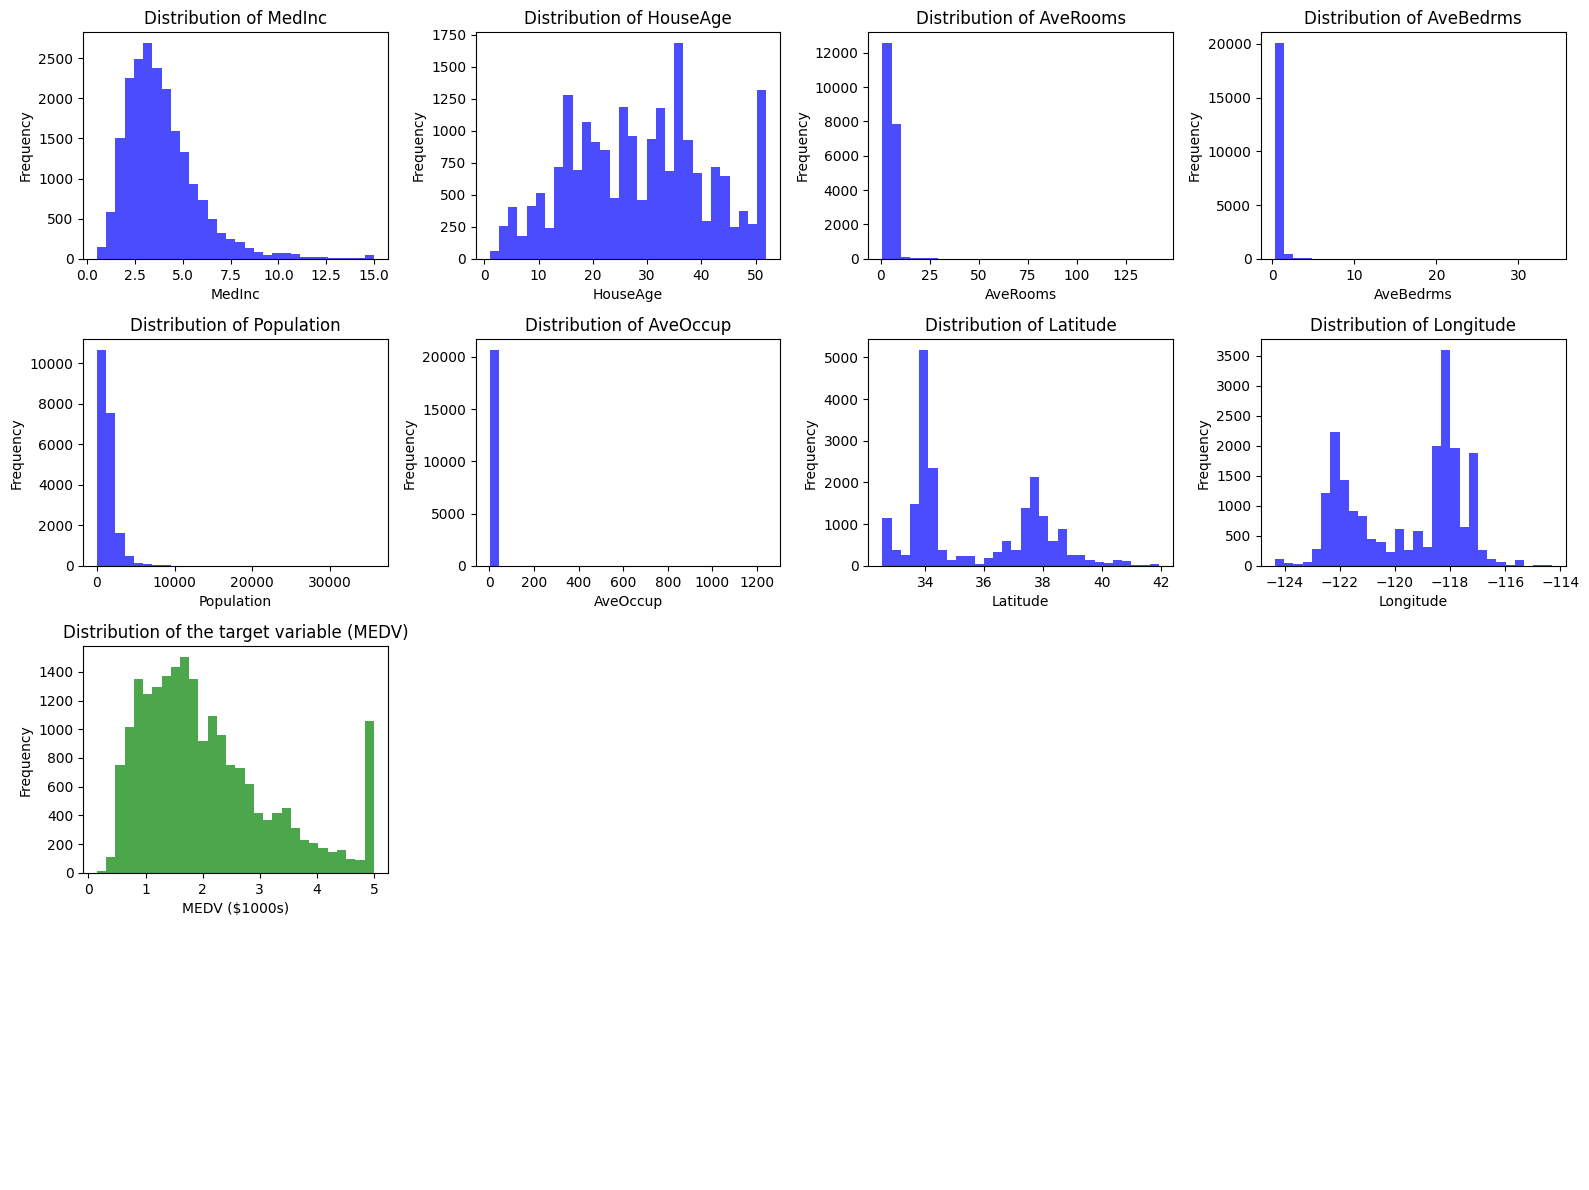

In [7]:
# Distribution of all features
fig, axes = plt.subplots(4, 4, figsize=(16, 12))
axes = axes.ravel()

for i, col in enumerate(housing.feature_names):
    ax = axes[i]
    ax.hist(df[col], bins=30, color='blue', alpha=0.7)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Add the target variable distr
ax = axes[len(housing.feature_names)]
ax.hist(df['MEDV'], bins=30, color='green', alpha=0.7)
ax.set_title('Distribution of the target variable (MEDV)')
ax.set_xlabel('MEDV ($1000s)')
ax.set_ylabel('Frequency')

# Remove unused subplots
for j in range(len(housing.feature_names) + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Are there any missing values?

In [8]:
print(df.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MEDV          0
dtype: int64


Are there any outliers?

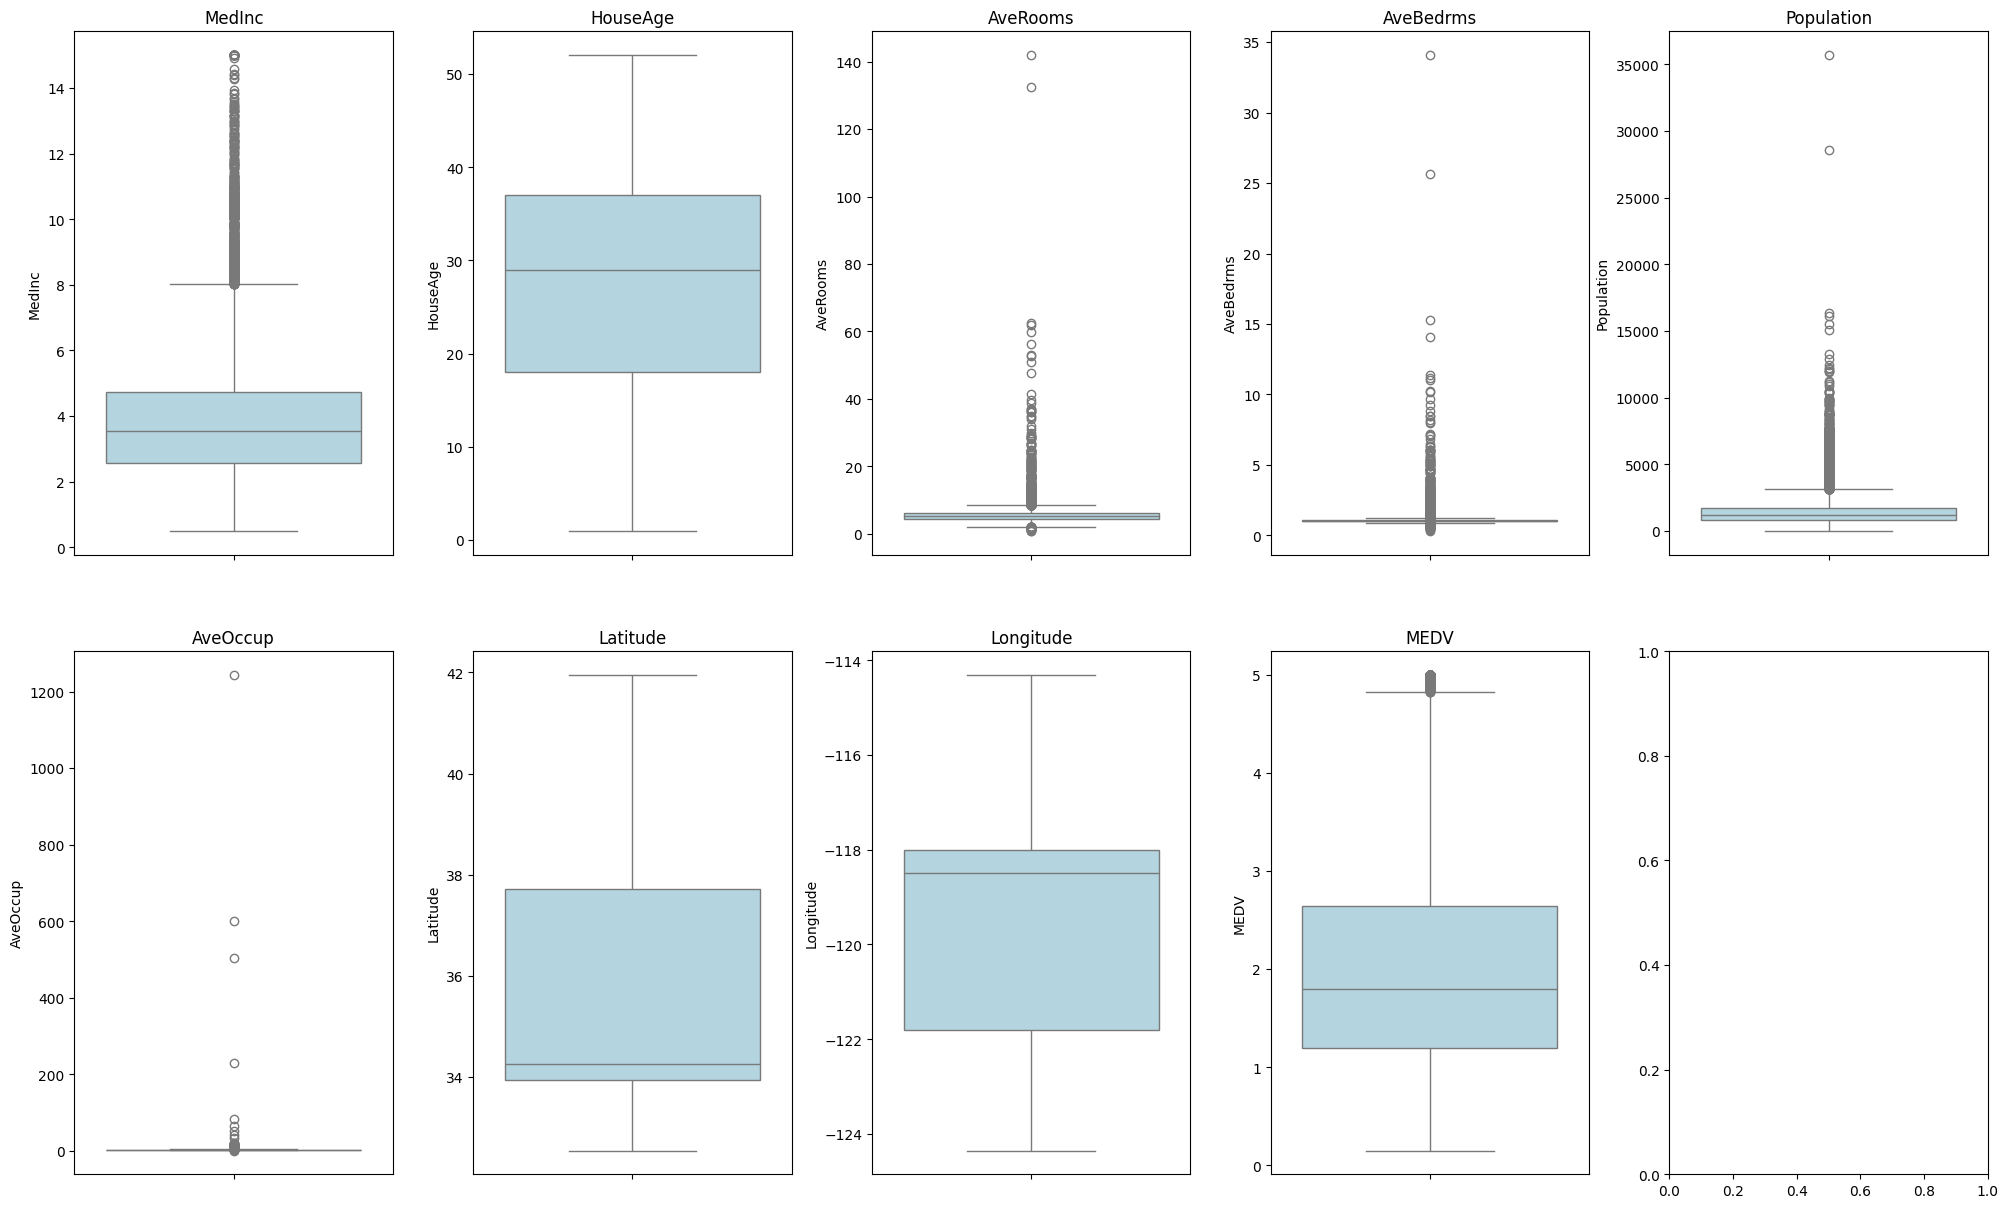

In [9]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 12))
axs = axs.flatten()

# Create boxplot for each feature
index = 0
for col in df.columns:
    sns.boxplot(y=df[col], ax=axs[index], color='lightblue')
    axs[index].set_title(f'{col}')
    axs[index].set_ylabel(col)
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()


Investigate the relationships between features and the outcome variable.

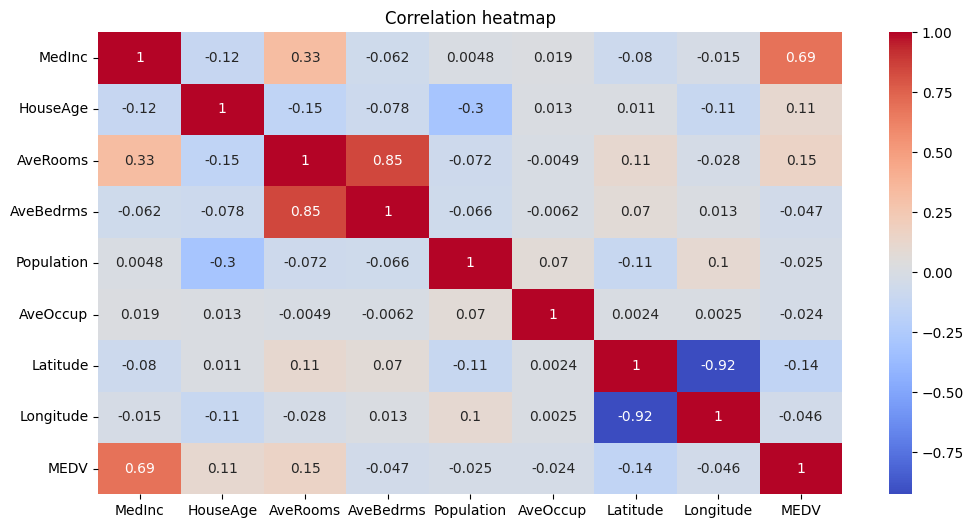

In [10]:
# Correlation matrix & heatmap
plt.figure(figsize=(12, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

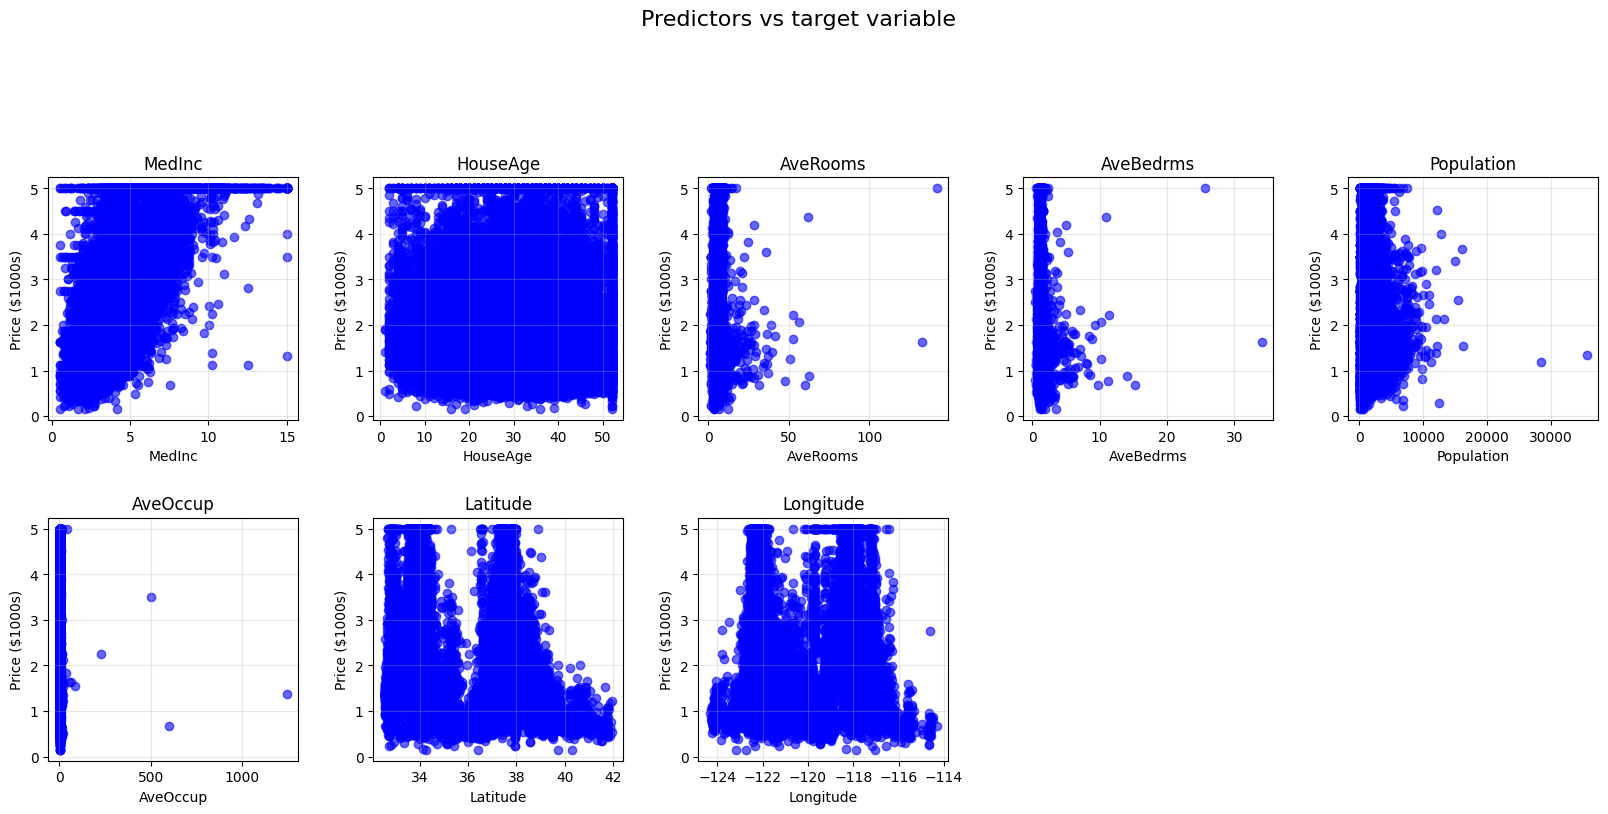

In [11]:
# Scatter plots of features vs target variable (MEDV)
fig, axes = plt.subplots(3, 5, figsize=(20, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

for i, ax in enumerate(axes.ravel()):
    if i < len(housing.feature_names):
        ax.scatter(df[housing.feature_names[i]], df['MEDV'], alpha=0.6, color='blue')
        ax.set_title(housing.feature_names[i], fontsize=12)
        ax.set_xlabel(housing.feature_names[i], fontsize=10)
        ax.set_ylabel("Price ($1000s)", fontsize=10)
        ax.grid(alpha=0.3)
    else:
        ax.set_visible(False)

plt.suptitle('Predictors vs target variable', fontsize=16, y=1.02)
plt.show()

Based on the EDA, what do you observe?
- Do some features need encoding?
- Do all feature share a similar range, or would they need scaling?
- Are there any outliers or missing values that need to be taken care of?

By addressing these questions, we inform our preprocessing choices and make sure that the data is properly prepared for the models.

### **2. Wine Dataset** (classification task)

In [12]:
from sklearn.datasets import load_wine

In [13]:
# Load and describe the dataset
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [14]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

**Exploratory data analysis**

Just like for the housing dataset, you need to analyse the dataset's features and predictor variable relationships.

In [15]:
# convert into a dataframe
df = pd.DataFrame(wine.data, columns=wine.feature_names)
# extract the target variable
df['Class'] = wine.target

Basic statistics




> Is the dataset balanced?



In [16]:
print("Dataset sample: ")
print(df.head())
print("Basic statistics:")
print(df.describe())

print("Dataset balance: ", df['Class'].value_counts())

Dataset sample: 
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  Cla

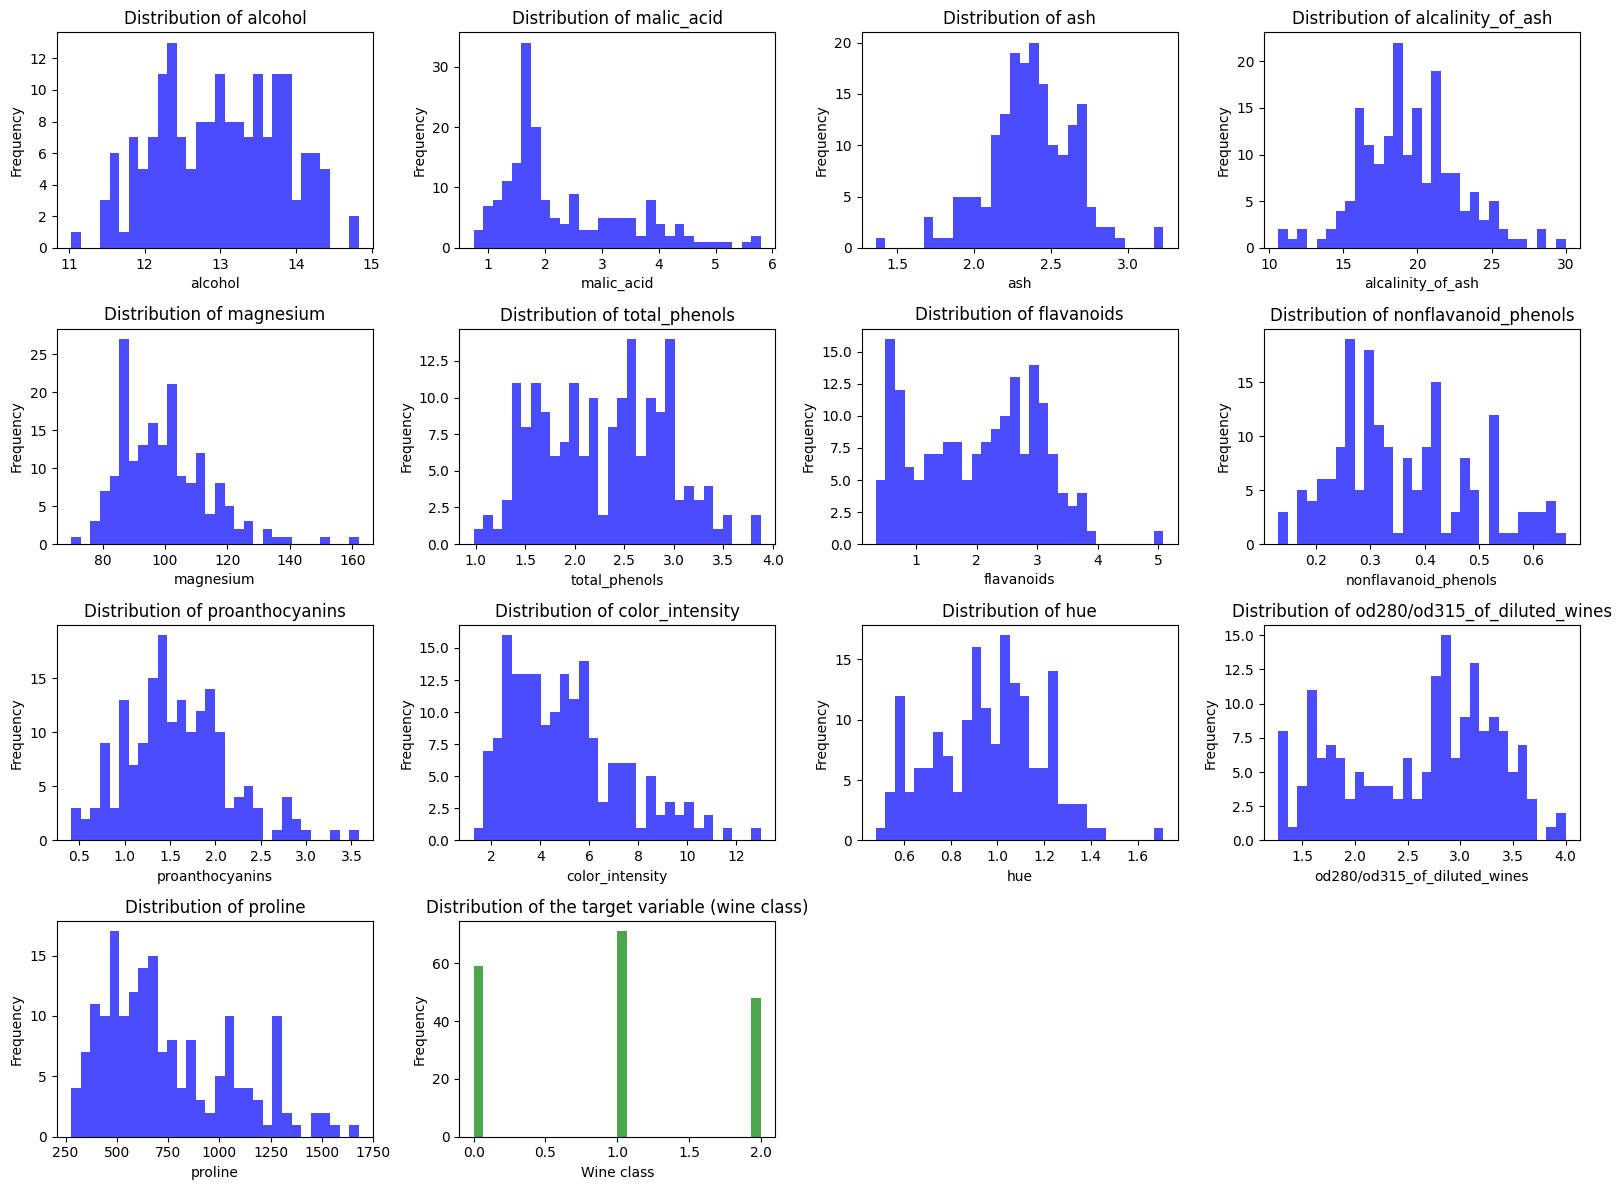

In [17]:
# Distribution of all features
fig, axes = plt.subplots(4, 4, figsize=(16, 12))
axes = axes.ravel()

for i, col in enumerate(wine.feature_names):
    ax = axes[i]
    ax.hist(df[col], bins=30, color='blue', alpha=0.7)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Add the target variable distr
ax = axes[len(wine.feature_names)]
ax.hist(df['Class'], bins=30, color='green', alpha=0.7)
ax.set_title('Distribution of the target variable (wine class)')
ax.set_xlabel('Wine class')
ax.set_ylabel('Frequency')

# Remove unused subplots
for j in range(len(wine.feature_names) + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Missing values? Outliers?
Inter-feature relationships?

In [18]:
print(df.isnull().sum())

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
Class                           0
dtype: int64


Correlation with outcome? Hint: plot feature distributions stratified on outcome.

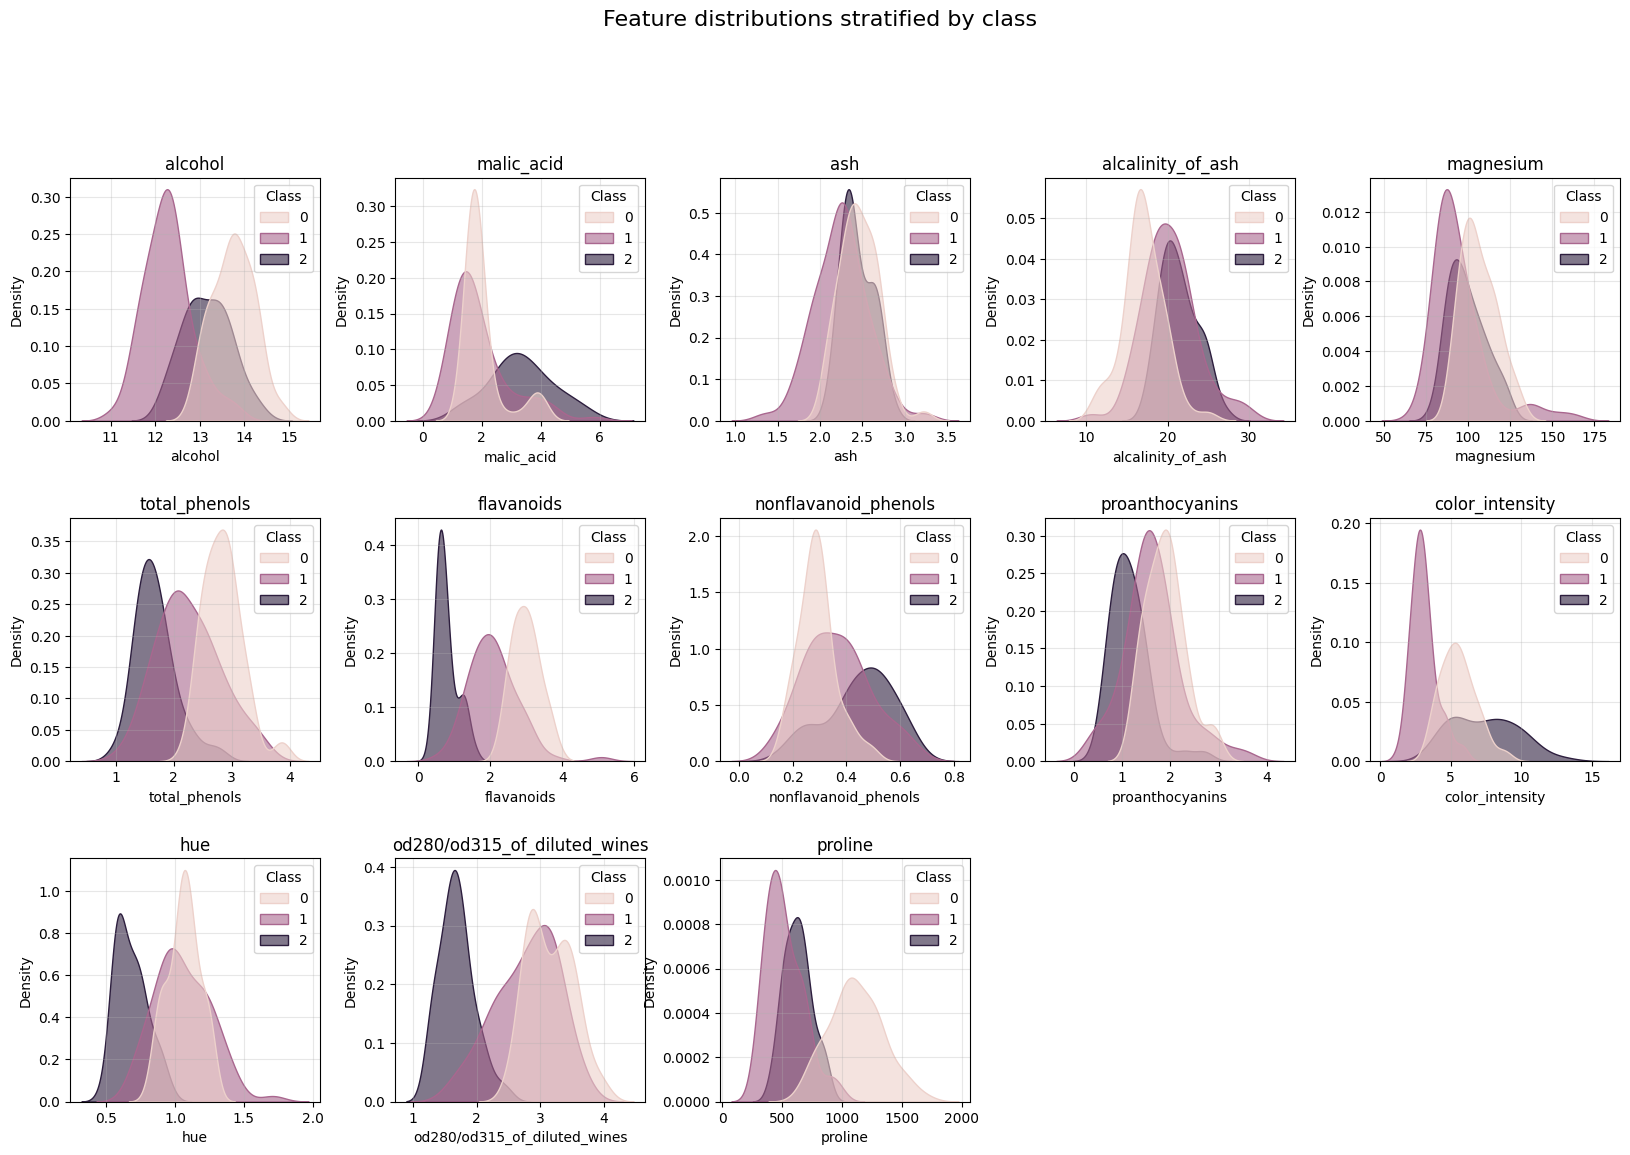

In [19]:
fig, axes = plt.subplots(3, 5, figsize=(20, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Loop through features and plot distr for each class
for i, ax in enumerate(axes.ravel()):
    if i < len(df.columns) - 1:
        sns.kdeplot(data=df, x=df.columns[i], hue='Class', ax=ax, fill=True, alpha=0.6)
        ax.set_title(f'{df.columns[i]}', fontsize=12)
        ax.set_xlabel(df.columns[i], fontsize=10)
        ax.set_ylabel("Density", fontsize=10)
        ax.grid(alpha=0.3)
    else:
        ax.set_visible(False)

plt.suptitle('Feature distributions stratified by class', fontsize=16, y=1.02)
plt.show()


## 2. Training some models

In this section, you have to design: <br>
<br>1) A model to predict the wine class of different wine samples (wine dataset).
<br>2) A model to predict the house price class (housing dataset).

Try out different models and compare them.


Based on the EDA, what preprocessing steps are needed? Try to compare different preprocessing methods (e.g., feature scaling methods) to assess their impact on the models.

Helpful imports

In [20]:
# some models..
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


# evaluation metrics..
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score


# different scalers to try out..
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

# if you want to make a pipeline
from sklearn.pipeline import make_pipeline

# to split data into train and test sets..
from sklearn.model_selection import train_test_split

### Example: Impact of feature scaling

Normalization scales each input variable separately to the range 0-1.  
Standardization scales each input variable separately by subtracting the mean (centering) and dividing each of them by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

#### Example usage of sklearn.preprocessing.StandardScaler

In [21]:
# Example
unscaled_data = np.asarray([[100, 0.001],
 [8, 0.05],
 [50, 0.005],
 [88, 0.07],
 [4, 0.1]])
# define standard scaler
scaler = StandardScaler()
# transform data
scaled_data = scaler.fit_transform(unscaled_data)

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>]],
      dtype=object)

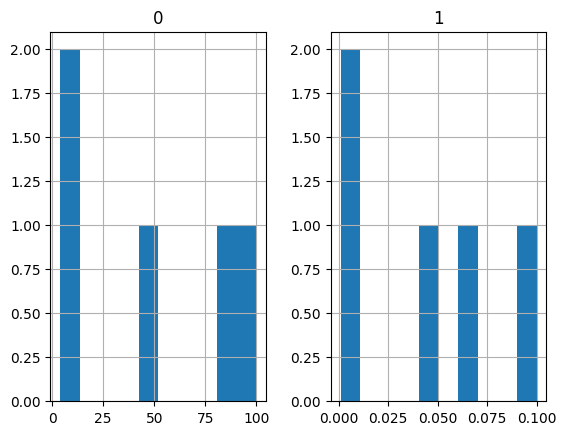

In [22]:
pd.DataFrame(unscaled_data).hist()

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>]],
      dtype=object)

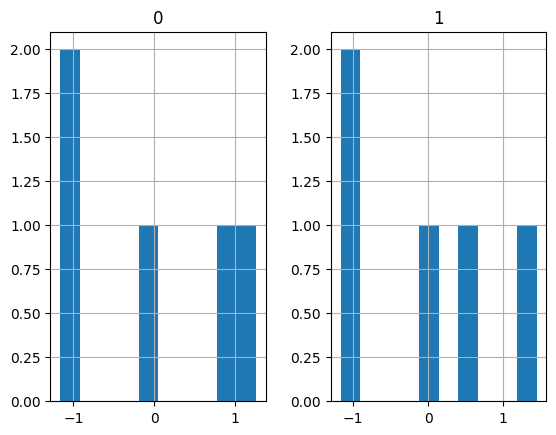

In [23]:
pd.DataFrame(scaled_data).hist()

In [24]:
del scaled_data, unscaled_data, scaler

**Questions**  
- Try using different scaling methods, such as MinMaxScaler and Normalisation. Do you see the difference in the histogram?
- Experiment the effects of different feature scaling methods on various ML algorithms e.g. KNN, SVM, Decision-Tree.

#### Scaling Vs. Unscaling the Wine Dataset

In [25]:
RANDOM_STATE = 42
# We are using the wine dataset
features, target = load_wine(return_X_y=True)

# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=RANDOM_STATE)

In [26]:
# Define scalers and models
scalers = {
    'None': None,
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'Normalizer': Normalizer()
}

models = [
    'KNeighborsClassifier',
    'SVC',
    'DecisionTreeClassifier'
]

# Store results as: results[model][scaler] = accuracy
results = {model_name: {} for model_name in models}

# Iterate over each model
for model_name in models:

    # Iterate over each scaler
    for scaler_name, scaler in scalers.items():

        # Scale if needed
        if scaler is None:
            Xtr, Xte = X_train, X_test
        else:
            Xtr = scaler.fit_transform(X_train)
            Xte = scaler.transform(X_test)

        # Create a NEW model instance
        if model_name == 'KNeighborsClassifier':
            model_instance = KNeighborsClassifier()
        elif model_name == 'SVC':
            model_instance = SVC(random_state=RANDOM_STATE)
        elif model_name == 'DecisionTreeClassifier':
            model_instance = DecisionTreeClassifier(random_state=RANDOM_STATE)

        # Fit + predict
        model_instance.fit(Xtr, y_train)
        y_hat = model_instance.predict(Xte)

        # Save accuracy
        results[model_name][scaler_name] = accuracy_score(y_test, y_hat)

# Convert to DataFrame (rows=models, cols=scalers)
results_df = pd.DataFrame(results).T
results_df


,None,StandardScaler,MinMaxScaler,Normalizer
KNeighborsClassifier,0.740741,0.962963,0.944444,0.759259
SVC,0.759259,0.981481,0.981481,0.462963
DecisionTreeClassifier,0.962963,0.962963,0.962963,0.962963


#### Scaling vs unscaling housing dataset

In [27]:
# Load the housing dataset
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define scalers and models
scalers = {
    'None': None,
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'Normalizer': Normalizer()
}

models = [
    'LinearRegression',
    'RandomForestRegressor',
    'SVR']

# Store results: results[model][scaler] = metrics
results = {}

# Iterate over each model
for model_name in models:
    results[model_name] = {}

    # Iterate over each scaler
    for scaler_name in scalers:
        scaler = scalers[scaler_name]

        # Scale if needed
        if scaler is None:
            Xtr, Xte = X_train, X_test
        else:
            Xtr = scaler.fit_transform(X_train)
            Xte = scaler.transform(X_test)

        # Create a NEW model instance
        if model_name == 'LinearRegression':
            model_instance = LinearRegression()
        elif model_name == 'RandomForestRegressor':
            model_instance = RandomForestRegressor(random_state=42)
        elif model_name == 'SVR':
            model_instance = SVR()

        # Fit + predict
        model_instance.fit(Xtr, y_train)
        y_hat = model_instance.predict(Xte)

        # Compute metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_hat))
        r2 = r2_score(y_test, y_hat)

        # Store metrics
        results[model_name][scaler_name] = {
            'RMSE': rmse,
            'R2': r2
        }

# ===== Build nicely formatted tables =====

# RMSE table (lower is better)
rmse_df = pd.DataFrame({
    model: {scaler: results[model][scaler]['RMSE'] for scaler in scalers}
    for model in models
}).T.round(3)

# R^2 table (higher is better)
r2_df = pd.DataFrame({
    model: {scaler: results[model][scaler]['R2'] for scaler in scalers}
    for model in models
}).T.round(3)


In [28]:
display(rmse_df)
display(r2_df)

,None,StandardScaler,MinMaxScaler,Normalizer
LinearRegression,0.746,0.746,0.746,0.990
RandomForestRegressor,0.505,0.505,0.505,0.670
SVR,1.154,0.597,0.687,1.104


,None,StandardScaler,MinMaxScaler,Normalizer
LinearRegression,0.576,0.576,0.576,0.252
RandomForestRegressor,0.805,0.805,0.805,0.657
SVR,-0.016,0.728,0.640,0.070


## 3. Working with a messier dataset: **Adult Census Dataset**

Classification task: predict whether income >50K

### 3.1 Exploratory data analysis
Same as before, analyse the dataset to identify the necessary preprocessing steps.

In [29]:
# Open the csv file and skim through it. It does not have column names
# so we will allocate names to each column

# Naming the Columns
names = ['age','workclass','fnlwgt','education','education-num',
        'marital-status','occupation','relationship','race','sex',
        'capital-gain','capital-loss','hours-per-week','native-country',
        'y']

# Load dataset with specifying ' ?' as missing values
df = pd.read_csv('adult.data', delimiter=',', names=names, na_values=' ?')

# Number of observations
print("Number of observations: ", len(df))

# Look at sample of data
df.head(5)

Number of observations:  32561


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Basis statistics

In [30]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Is the datset balanced?

In [31]:
print("Dataset balance: ", df['y'].value_counts())

Dataset balance:  y
<=50K    24720
>50K      7841
Name: count, dtype: int64


Disribution of features and relationship to target variabe



> Notice the range and cardinality of the different features. Is the range consistent across the numerical features? How many categories do categorical variables have?



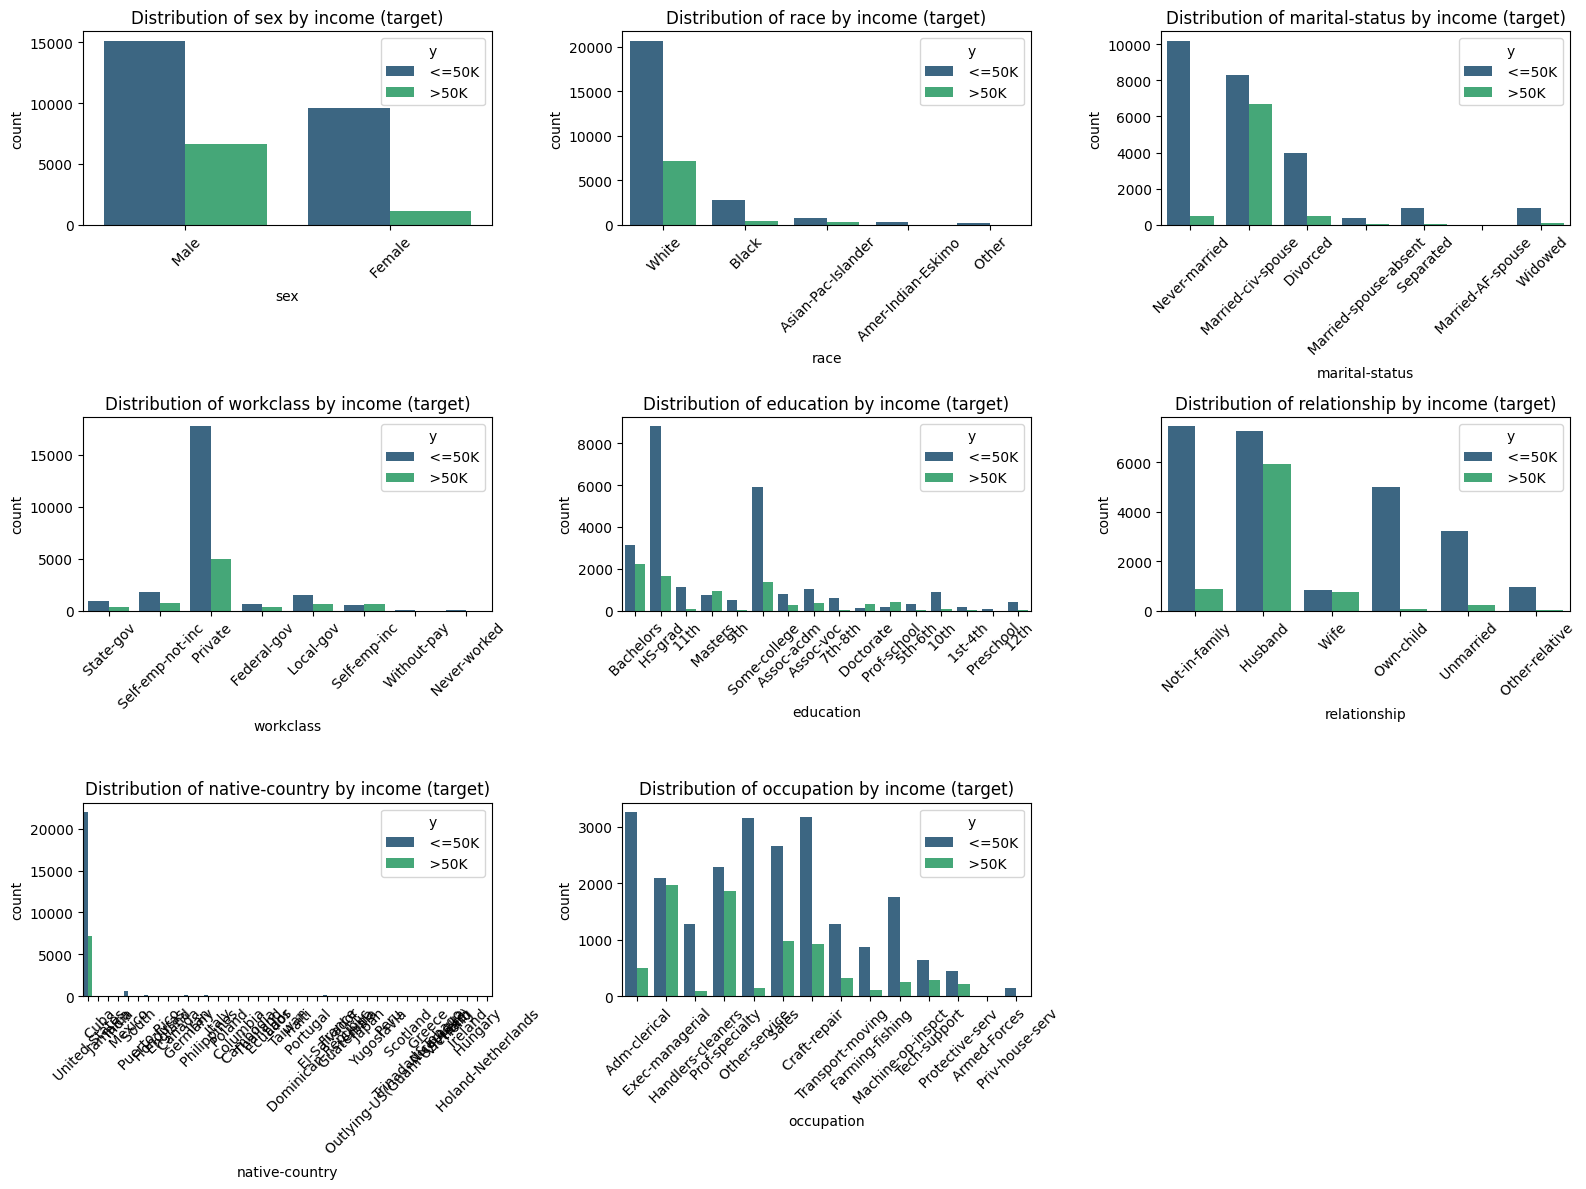

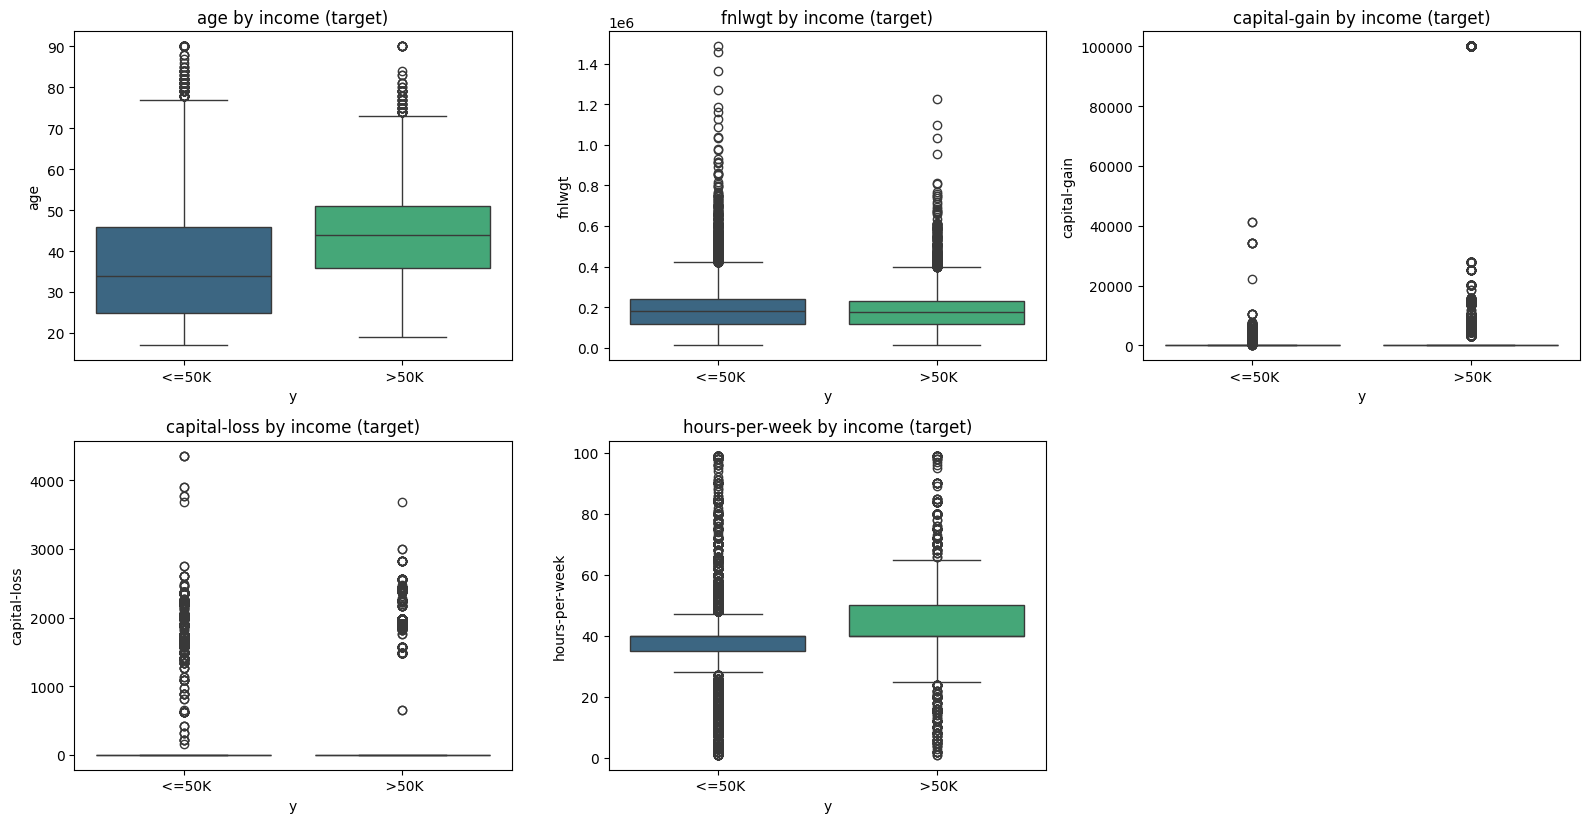

In [32]:
# make index unique (prevents seaborn/pandas reindex error)
df_plot = df.reset_index(drop=True)

categorical_cols = ['sex', 'race', 'marital-status', 'workclass', 'education',
                    'relationship', 'native-country', 'occupation']
num_cols = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

# Categorical features: bar plots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df_plot, x=col, hue='y', palette='viridis', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by income (target)')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(len(categorical_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Numerical features: box plots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=df_plot, x='y', y=col, palette='viridis', ax=axes[i])
    axes[i].set_title(f'{col} by income (target)')

for j in range(len(num_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


Check for missing values

In [33]:
print(df.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
y                    0
dtype: int64


In [34]:
# Example the 15th row of the DataFrame - notice NaN
row_15 = df.iloc[14]
print(row_15)

age                                40
workclass                     Private
fnlwgt                         121772
education                   Assoc-voc
education-num                      11
marital-status     Married-civ-spouse
occupation               Craft-repair
relationship                  Husband
race               Asian-Pac-Islander
sex                              Male
capital-gain                        0
capital-loss                        0
hours-per-week                     40
native-country                    NaN
y                                >50K
Name: 14, dtype: object


### 3.2 Data preprocessing
Based on the EDA, what type of preprocessing is needed?
- Do features need to be scaled and encoded?
- Do missing values need to be imputed?

A quick data fix

In [35]:
# For now, we will drop the rows with missing (NA) values
df = df.dropna()
len(df)

30162

In [36]:
# Task: Get the unique values in the race and y column
df['race'].unique()
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [37]:
# We see redundant space prefix in the values. Remove them.
df['race'] = df['race'].apply(lambda x: x.strip())

In [38]:
df['race'].unique(), df['y'].unique(), df['occupation'].unique()

(array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
        'Other'], dtype=object),
 array([' <=50K', ' >50K'], dtype=object),
 array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
        ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
        ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
        ' Craft-repair', ' Protective-serv', ' Armed-Forces',
        ' Priv-house-serv'], dtype=object))

Hmmm it's not just the race and y column.

In [39]:
# Let's try to apply this to all the string-valued columns
for col_name in df.columns:
    if df[col_name].dtype == object:  # Checking for object type (string in pandas)
        df[col_name] = df[col_name].apply(lambda x: x.strip() if isinstance(x, str) else x)


Check the data

In [40]:
for col_name in df.columns:
    if not 'int' in str(df[col_name].dtype):
        print(df[col_name].unique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']
['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippines' 'Poland'
 'Columbia' 'Cambodia' 'Thailand' 'Ecuador' 'Laos' 'Taiwan' 'Haiti'
 'Portugal

All done! You can now start data preprocessing such as encoding and imputation.

#### **TASK 1: Encoding categorical variables** (label/ordinal encoding & one-hot encoding)

Important: We need special care when we are encoding categorical variables

**1. Take care of the missing values**
- Beware not to encode missing values unless you are intending to do so.
- Sometimes you want to encode missing values to a separate cateogory. For example, when you want to predict if passengers of titanic had survived or not, missing data of certain features can actually have meaning, i.e., Cabin information can be missing because the body was not found.

**2. Know which encoding and scaling method you should select**
- If your categories are ordinal, then it makes sense to use a LabelEncoder with a MinMaxScaler. For example, you can encode [low, medium, high], as [1,2,3], i.e., distance between low to high is larger than that of medium and high.

- However, if you have non-ordinal categorical values, like [White, Hispanic, Black, Asian], then it would be better to use a OneHotEncoder instead of forcing ordinality with a LabelEncoder. Otherwise the algorithms you use (especially distance based algorithms like KNN) will make the assumption that the distance between White and Asian is larger than White and Hispanic, which is nonsensical.

**3. Split before you encode to avoid data leakage**
- If training a model using train/ test slit, you should split the dataset before you encode your data. It is natural for algorithms to see unknown values in the validation/test set that was not appearing in the train set. `sklearn.preprocessing.OneHotEncoder` is good at handling these unknown categories (`handle_unknown` parameter).

- Discussion: What if you are certain about all the possible categories that can appear for each feature? Can you encode all the values before splitting the dataset into train and test set?


This notebook shows the three points in the following sections with examples.



> What type of encoding is most appropriate for the different categorical features? For example, should education and native-country be encoded using the same technique?



In [41]:
# Import encoders from sklearn
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

In [42]:
# Ordinal Encoding for 'education'
# Define the order of education categories
education_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Bachelors', 'Masters', 'Doctorate']
# Initialize the OrdinalEncoder with the specified categories
ordinal_encoder = OrdinalEncoder(categories=[education_order])
# Apply the OrdinalEncoder to the 'education' column
df['education_encoded'] = ordinal_encoder.fit_transform(df[['education']])

# Check resulting education ordering
edu_map = {}
for i, row in df[["education", "education_encoded"]].iterrows():
    education = row["education"]
    edu_num = row["education_encoded"]

    if education not in edu_map:
        edu_map.update({education: edu_num})
    else:
        assert edu_map[education] == edu_num
edu_map


{'Bachelors': 13.0,
 'HS-grad': 8.0,
 '11th': 6.0,
 'Masters': 14.0,
 '9th': 4.0,
 'Some-college': 9.0,
 'Assoc-acdm': 11.0,
 '7th-8th': 3.0,
 'Doctorate': 15.0,
 'Assoc-voc': 10.0,
 'Prof-school': 12.0,
 '5th-6th': 2.0,
 '10th': 5.0,
 'Preschool': 0.0,
 '12th': 7.0,
 '1st-4th': 1.0}

In [43]:
# OneHotEncoding for nominal features without an implied order
# Including the previously missed nominal columns
nominal_columns = ['workclass', 'occupation', 'native-country', 'marital-status', 'relationship', 'race', 'sex']
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
onehot_encoded_columns = onehot_encoder.fit_transform(df[nominal_columns])
column_names = onehot_encoder.get_feature_names_out(nominal_columns)
df_onehot_encoded = pd.DataFrame(onehot_encoded_columns, columns=column_names)

# Integrate these new columns back into the original dataframe
df = df.reset_index(drop=True)  # Reset index to align with the new onehot encoded DataFrame
df = pd.concat([df, df_onehot_encoded], axis=1)

# Optionally, remove the categorical columns if no longer needed
df.drop(columns=nominal_columns + ['education'], inplace=True)

# Label Encoding for the target variable
label_encoder = LabelEncoder()
df['y_encoded'] = label_encoder.fit_transform(df['y'])

# Remove the original 'y' column if no longer needed
df.drop(columns=['y'], inplace=True)

Check your encoding results

In [44]:
# Display the first few rows of the modified DataFrame
df.head(10)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,education_encoded,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,y_encoded
0,39,77516,13,2174,0,40,13.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
1,50,83311,13,0,0,13,13.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
2,38,215646,9,0,0,40,8.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
3,53,234721,7,0,0,40,6.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
4,28,338409,13,0,0,40,13.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
5,37,284582,14,0,0,40,14.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
6,49,160187,5,0,0,16,4.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
7,52,209642,9,0,0,45,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
8,31,45781,14,14084,0,50,14.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
9,42,159449,13,5178,0,40,13.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


#### **TASK 2: Dealing with missing data** - imputation strategies

In processing the data earlier, we did not take account of the missing values.

In [45]:
# Re-Load dataset with specifying ' ?' as missing values
df = pd.read_csv('adult.data', delimiter=',', names=names, na_values=' ?')
# Remove redundant space (same as before)
for col_name in df.columns:
    if df[col_name].dtype == object:  # Checking for object type (string in pandas)
        df[col_name] = df[col_name].apply(lambda x: x.strip() if isinstance(x, str) else x) # Remove redundant space

**Task**: Create 3 datasets using different methods for dealing with missing data:
<br>A: Drop missing values, B: KNN imputation, C: Most frequent imputation


In [46]:
from sklearn.model_selection import train_test_split
import numpy as np

def train_test_split_df(df, test_ratio=0.3, target_col="y", random_state=42):
    # Separate features and target
    df_data = df.drop(columns=[target_col])
    df_target = df[target_col]

    # Randomized train-test split with a fixed seed
    train_X_df, test_X_df, train_y_df, test_y_df = train_test_split(
        df_data, df_target, test_size=test_ratio, random_state=random_state
    )

    # Convert target variable to binary (assuming it's categorical with ">50K" and others)
    train_y_df = np.where(train_y_df == ">50K", 1, 0)
    test_y_df = np.where(test_y_df == ">50K", 1, 0)

    return train_X_df, train_y_df, test_X_df, test_y_df

# Split your data into train and test splits

train_X, train_y, test_X, test_y = train_test_split_df(df)

print(len(train_X))
print(len(train_y))
print(len(test_X))
print(len(test_y))


22792
22792
9769
9769


In [47]:
# Check for missing values
print(train_X.isnull().sum())
print(test_X.isnull().sum())

age                  0
workclass         1267
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1274
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     405
dtype: int64
age                 0
workclass         569
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        569
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    178
dtype: int64


Step 1: encode features without missing values
<br> `native-country`, `occupation` and `workclass` have missing values, so we first need to impute them before encoding

In [48]:
# Ordinal Encoding for 'education'
education_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th',
                   '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc',
                   'Assoc-acdm', 'Prof-school', 'Bachelors', 'Masters', 'Doctorate']
ordinal_encoder = OrdinalEncoder(categories=[education_order])

train_X['education_encoded'] = ordinal_encoder.fit_transform(train_X[['education']])
test_X['education_encoded'] = ordinal_encoder.transform(test_X[['education']])

# OneHotEncoding for nominal features without missing values and without an implied order
nominal_columns_without_missing = ['marital-status', 'relationship', 'race', 'sex']  # These have no missing values
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit on training data and apply to both train and test
train_onehot_encoded = onehot_encoder.fit_transform(train_X[nominal_columns_without_missing])
test_onehot_encoded = onehot_encoder.transform(test_X[nominal_columns_without_missing])

# Create DataFrames for one-hot encoded columns
train_onehot_df = pd.DataFrame(train_onehot_encoded, columns=onehot_encoder.get_feature_names_out(nominal_columns_without_missing))
test_onehot_df = pd.DataFrame(test_onehot_encoded, columns=onehot_encoder.get_feature_names_out(nominal_columns_without_missing))

# Reset indices for consistency and combine data
train_X = train_X.reset_index(drop=True)
test_X = test_X.reset_index(drop=True)
train_X = pd.concat([train_X, train_onehot_df], axis=1)
test_X = pd.concat([test_X, test_onehot_df], axis=1)

# Drop the original nominal and 'education' columns from both datasets
train_X.drop(columns=nominal_columns_without_missing + ['education'], inplace=True)
test_X.drop(columns=nominal_columns_without_missing + ['education'], inplace=True)

# Verify the transformed datasets
print("Training data (X):")
train_X.head()

#print("\nTesting data (X):")
#test_X.head()



Training data (X):


,age,workclass,fnlwgt,education-num,occupation,capital-gain,capital-loss,hours-per-week,native-country,education_encoded,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,34,Self-emp-not-inc,56460,9,Farming-fishing,0,2179,12,United-States,8.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,48,Self-emp-not-inc,243631,10,Craft-repair,7688,0,40,United-States,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,23,State-gov,56402,10,Prof-specialty,0,0,30,United-States,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,56,Local-gov,255406,9,Exec-managerial,0,0,40,United-States,8.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,17,Private,297246,7,Priv-house-serv,0,0,9,United-States,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**Dataset A:** drop missing values (same as dataset in Task 1).

In [49]:
# A: Dataset with dropped missing values
# Drop rows with missing values in the training and testing datasets
train_X_dropna = train_X.copy()
test_X_dropna = test_X.copy()

train_X_dropna = train_X_dropna.dropna()
test_X_dropna = test_X_dropna.dropna()

# Ensure alignment by dropping the corresponding rows in y
train_y_dropna = train_y[train_X_dropna.index]
test_y_dropna = test_y[test_X_dropna.index]

# Display missing value counts for train and test datasets
print("Missing values in training data after dropping rows:")
print(train_X_dropna.isnull().sum())

print("\nMissing values in testing data after dropping rows:")
print(test_X_dropna.isnull().sum())

# Display dataset lengths after dropping rows with missing values
print(f"\n\nDataset length after dropping rows containing NA (train): {len(train_X_dropna)}")
print(f"Dataset length after dropping rows containing NA (test): {len(test_X_dropna)}")



Missing values in training data after dropping rows:
age                                     0
workclass                               0
fnlwgt                                  0
education-num                           0
occupation                              0
capital-gain                            0
capital-loss                            0
hours-per-week                          0
native-country                          0
education_encoded                       0
marital-status_Married-AF-spouse        0
marital-status_Married-civ-spouse       0
marital-status_Married-spouse-absent    0
marital-status_Never-married            0
marital-status_Separated                0
marital-status_Widowed                  0
relationship_Not-in-family              0
relationship_Other-relative             0
relationship_Own-child                  0
relationship_Unmarried                  0
relationship_Wife                       0
race_Asian-Pac-Islander                 0
race_Black             

**Dataset B:** Most frequent imputation

In [50]:
from sklearn.impute import SimpleImputer

# Columns with missing values
columns_with_missing_values = ['workclass', 'occupation', 'native-country']

# Training data
train_X_mode_imputed = train_X.copy()

# Create an imputer object using the most frequent strategy and fit on training data
mode_imputer = SimpleImputer(strategy='most_frequent')
train_X_mode_imputed[columns_with_missing_values] = mode_imputer.fit_transform(train_X_mode_imputed[columns_with_missing_values])

# Testing data
test_X_mode_imputed = test_X.copy()

# Apply the trained imputer to the testing data
test_X_mode_imputed[columns_with_missing_values] = mode_imputer.transform(test_X_mode_imputed[columns_with_missing_values])

# Verify missing values in the resulting datasets
print("Missing values in training data after mode imputation:")
print(train_X_mode_imputed.isnull().sum())

print("\nMissing values in testing data after mode imputation:")
print(test_X_mode_imputed.isnull().sum())


Missing values in training data after mode imputation:
age                                     0
workclass                               0
fnlwgt                                  0
education-num                           0
occupation                              0
capital-gain                            0
capital-loss                            0
hours-per-week                          0
native-country                          0
education_encoded                       0
marital-status_Married-AF-spouse        0
marital-status_Married-civ-spouse       0
marital-status_Married-spouse-absent    0
marital-status_Never-married            0
marital-status_Separated                0
marital-status_Widowed                  0
relationship_Not-in-family              0
relationship_Other-relative             0
relationship_Own-child                  0
relationship_Unmarried                  0
relationship_Wife                       0
race_Asian-Pac-Islander                 0
race_Black           

Now that we have done data imputation, we can **encode the columns that had missing values** (`native-country`, `occupation` and `workclass`).  



> What type(s) of encoding is appropriate here?



In [51]:
from sklearn.preprocessing import OneHotEncoder

# Function to perform one-hot encoding
def apply_onehot_encoding(train_df, test_df, columns, encoder=None):
    # Fit OneHotEncoder on training data if no encoder is passed
    if encoder is None:
        encoder = OneHotEncoder(drop='first', sparse_output=False)
        encoder.fit(train_df[columns])

    # Transform both training and testing datasets
    train_encoded = encoder.transform(train_df[columns])
    test_encoded = encoder.transform(test_df[columns])

    # Create DataFrames for the encoded columns
    column_names = encoder.get_feature_names_out(columns)
    train_encoded_df = pd.DataFrame(train_encoded, columns=column_names)
    test_encoded_df = pd.DataFrame(test_encoded, columns=column_names)

    # Reset indices to ensure alignment and concatenate
    train_df_reset = train_df.reset_index(drop=True)
    test_df_reset = test_df.reset_index(drop=True)

    train_df_final = pd.concat([train_df_reset.drop(columns, axis=1), train_encoded_df.reset_index(drop=True)], axis=1)
    test_df_final = pd.concat([test_df_reset.drop(columns, axis=1), test_encoded_df.reset_index(drop=True)], axis=1)

    return train_df_final, test_df_final, encoder


# Columns to encode
columns_to_encode = ['workclass', 'occupation', 'native-country']

# Apply one-hot encoding for each imputed dataset (dropna, KNN, mode)

# 1. Dropna
train_X_dropna_encoded, test_X_dropna_encoded, dropna_encoder = apply_onehot_encoding(
    train_X_dropna, test_X_dropna, columns_to_encode
)

# 2. Mode Imputed
train_X_mode_encoded, test_X_mode_encoded, mode_encoder = apply_onehot_encoding(
    train_X_mode_imputed, test_X_mode_imputed, columns_to_encode
)

# Verify if any missing values remain after encoding
print("Missing values in dropna-encoded training data:", train_X_dropna_encoded.isnull().sum().sum())
print("Missing values in dropna-encoded testing data:", test_X_dropna_encoded.isnull().sum().sum())

print("\nMissing values in mode-encoded training data:", train_X_mode_encoded.isnull().sum().sum())
print("Missing values in mode-encoded testing data:", test_X_mode_encoded.isnull().sum().sum())


Missing values in dropna-encoded training data: 0
Missing values in dropna-encoded testing data: 0

Missing values in mode-encoded training data: 0
Missing values in mode-encoded testing data: 0


### 3.3 Train a classifier to predict outcome

Example: SVM or KNN Classifier

**Task**: Train a classifier on the different datasets to compare imputation method accuracy.

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


# Non-categorical features to scale
non_categorical_features = ["age", "fnlwgt", "capital-gain", "capital-loss", "hours-per-week"]

def scale_features(train_X, test_X, features_to_scale):
    scaler = StandardScaler()

    # Fit scaler on training data and transform both train and test sets
    train_scaled = scaler.fit_transform(train_X[features_to_scale])
    test_scaled = scaler.transform(test_X[features_to_scale])

    # Replace scaled features in the original DataFrame, maintaining indices
    train_X_scaled = train_X.copy()
    test_X_scaled = test_X.copy()
    train_X_scaled[features_to_scale] = pd.DataFrame(train_scaled, index=train_X.index, columns=features_to_scale)
    test_X_scaled[features_to_scale] = pd.DataFrame(test_scaled, index=test_X.index, columns=features_to_scale)

    return train_X_scaled, test_X_scaled


# Define classifiers
classifiers = {
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Datasets for each imputation type
datasets = {
    'Dropna': (train_X_dropna_encoded, train_y_dropna, test_X_dropna_encoded, test_y_dropna),
    'Mode Imputation': (train_X_mode_encoded, train_y, test_X_mode_encoded, test_y)
}

# Store results
results = []

# Train and test classifiers on each dataset
for imputation_type, (train_X, train_y, test_X, test_y) in datasets.items():
    # Apply scaling to non-categorical features
    train_X_scaled, test_X_scaled = scale_features(train_X, test_X, non_categorical_features)

    for classifier_name, classifier in classifiers.items():
        # Train the classifier
        classifier.fit(train_X_scaled, train_y)

        # Predict on the test set
        y_pred = classifier.predict(test_X_scaled)

        # Calculate accuracy
        accuracy = accuracy_score(test_y, y_pred)

        # Append the result
        results.append({
            'Imputation Type': imputation_type,
            'Classifier': classifier_name,
            'Accuracy': accuracy
        })
# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Pivot the DataFrame to organize results by Imputation Type and Classifier
pivot_df = results_df.pivot(index='Imputation Type', columns='Classifier', values='Accuracy')

# Display the table
print("\nClassifier Performance Across Imputation Types with Scaling:")
print(pivot_df.to_string(float_format="%.2f"))  # Display with two decimal places




Classifier Performance Across Imputation Types with Scaling:
Classifier       KNN  SVM
Imputation Type          
Dropna          0.83 0.85
Mode Imputation 0.83 0.85
